In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
import sys

## Task 1

## a)

In [5]:
ux0 = 0
u0t = 1
def FTBS(r=0.5, a=1, h =1/160):
    k = r*h
    N = int(2/k -1)
    M = int(3/h -1)
    
    U = np.zeros((M+1,N+1))

    for i in range(N):
        U[0,i+1] = u0t


    for i in range(N):
        n = i
        for j in range(M):
            m = j+1
            U[m,n+1] = U[m,n] - r*(U[m,n] - U[m-1,n])
    return U

def LaxWendrof(r=0.5, a=1, h =1/160):
    k = r*h
    N = int(2/k -1)
    M = int(3/h -1)
    
    U = np.zeros((M+1,N+1))
    
    for i in range(N):
        U[0,i+1] = u0t
        
    for i in range(N):
        n = i
        for j in range(M-1):
            m = j+1
            U[m,n+1] = U[m,n] - r/2*(U[m+1,n] - U[m-1,n]) + r**2/2*(U[m+1,n]-2*U[m,n] + U[m-1,n])
            
    return U

def Wendrof(r=0.5, a=1, h =1/160):
    k = r*h
    N = int(2/k -1)
    M = int(3/h -1)
    
    U = np.zeros((M+1,N+1))
    
    for i in range(N):
        U[0,i+1] = u0t
     
    A = np.zeros((M,M))
    for i in range(M):
        A[i,i] = 1
        if M > 0:
            A[i,i-1] = (1-r)/(1+r)
             
    for i in range(N):
        n = i
        b = np.zeros(M)
        
        b = U[:-1,n] + (1-r)/(1+r)*U[1:,n]
        b[0] += -(1-r)/(1+r)*u0t
        
        U[1:,n+1] = np.linalg.solve(A,b)
    
    return U

In [6]:
def pltftbs(r=0.5, a=1, h =1/160):
    k = r*h
    N = int(2/k -1)
    M = int(3/h -1)
    UFTBS = FTBS(r,a,h)
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 3), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)


    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "Numerical solution for t = " + str(round((k*i),2)) + ", r = " + str(r) 
        ax.set_title(titl)
        x = np.linspace(0, 3, M+1)
        y = UFTBS[:,i]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N+1, interval=10, blit=True)
    plt.show()
    return anim

In [7]:
def pltlw(r=0.5, a=1, h =1/160):
    k = r*h
    N = int(2/k -1)
    M = int(3/h -1)
    ULW = LaxWendrof(r,a,h)
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 3), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)


    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "Numerical solution for t = " + str(round((k*i),2)) + ", r = " + str(r) 
        ax.set_title(titl)
        x = np.linspace(0, 3, M+1)
        y = ULW[:,i]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N+1, interval=10, blit=True)
    plt.show()
    return anim

In [8]:
def pltuw(r=0.5, a=1, h =1/160):
    k = r*h
    N = int(2/k -1)
    M = int(3/h -1)
    UW = Wendrof(r,a,h)
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 3), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)


    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "Numerical solution for t = " + str(round((k*i),2)) + ", r = " + str(r)
        ax.set_title(titl)
        x = np.linspace(0, 3, M+1)
        y = UW[:,i]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N+1, interval=10, blit=True)
    plt.show()
    return anim

<IPython.core.display.Javascript object>


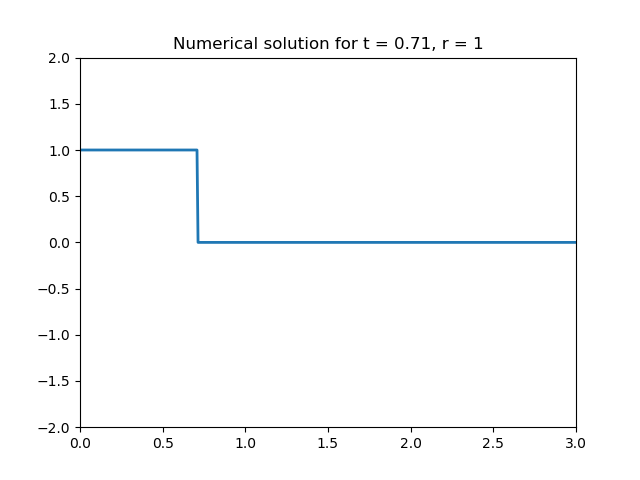

In [10]:
pltftbs(r=1)

<IPython.core.display.Javascript object>


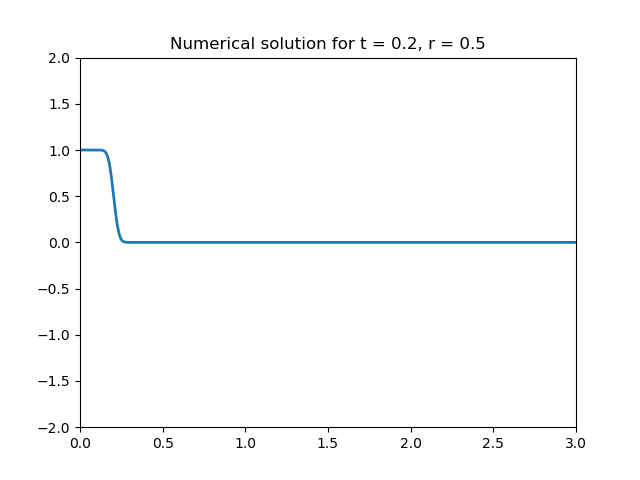

In [18]:
pltftbs(r=0.5)

<IPython.core.display.Javascript object>


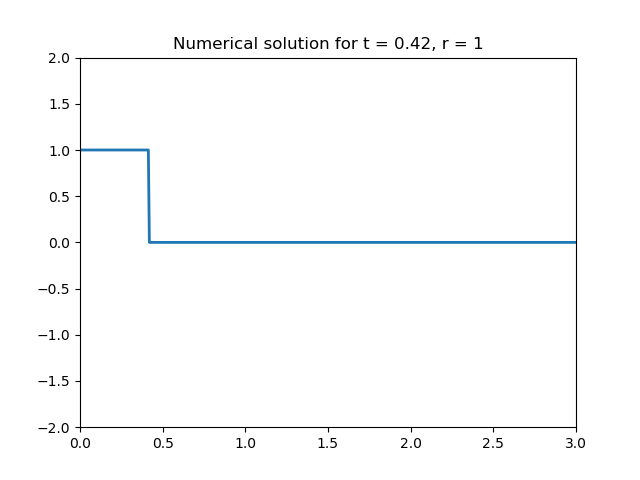

In [19]:
pltlw(r=1)

<IPython.core.display.Javascript object>


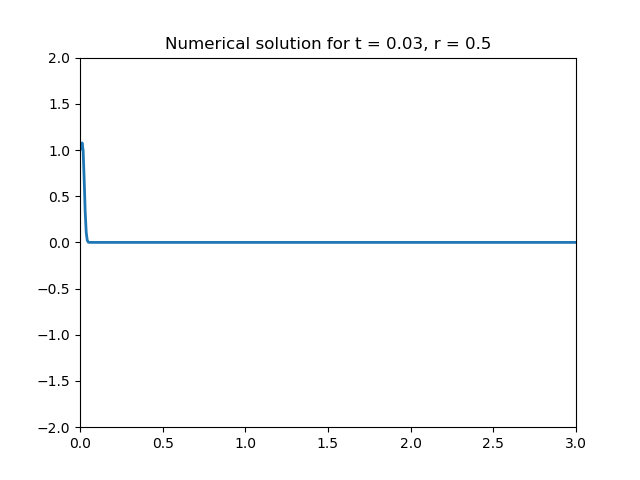

In [25]:
pltlw(r=0.5)

<IPython.core.display.Javascript object>


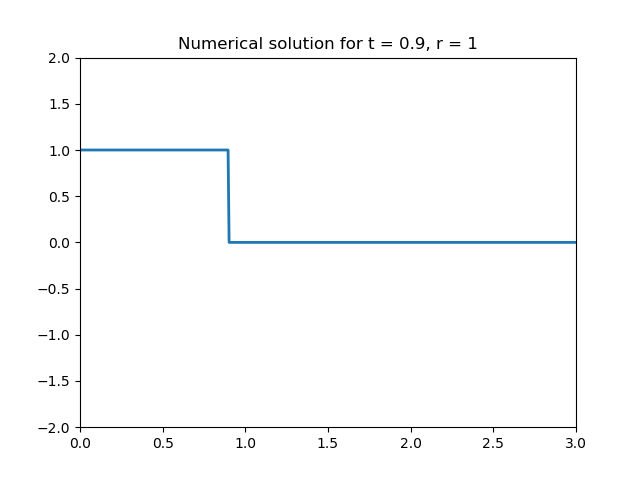

In [26]:
pltuw(r=1)

<IPython.core.display.Javascript object>


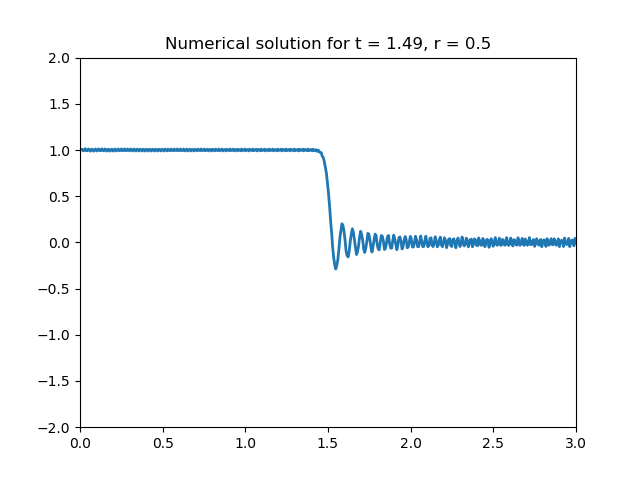

In [27]:
pltuw(r=0.5)

Above are plots of numerical solutions of the transport problem $$u_t + a u_x = 0,\quad  0 \leq x \leq 3,\quad   u(x,0)=f(x),\quad u(0,t) = g(t)$$
produced with respectively forward-time backwards-space, Lax-Wendroffs method and Wendroffs method with Courant number $r = ak / h = 1$ and $r = 0.5$ on each. We observe that all of the methods produces the exact solution whith $r = 1$ as expected. 

For the different methods above we observe that with $r = 0.5$ they each produces an unique numerical solution- Forward time backwards space can seem to have increasing dispertion, which can be seen as the solution takes on a gentler slope as time progresses. We  can see the same result for Wendroffs method and Lax-wendroffs method. Lax-Wendroff does in addition have visible increasing amplitude something that can suggest dissipation. 

## b)

By applying $U^n_m = \xi^n e^{i \beta x_m}$ to Wendroffs method $$\xi^{n+1}e^{i \beta x_m} = \xi^n e^{i \beta x_{m-1}} - \frac{1-r}{1+r} (\xi^{n+1} e^{i\beta x_{m-1}} - \xi^n e^{i \beta x_m})$$
one can get the expression

$$\xi = e^{i \beta h} \frac{\frac{1-r}{1+r} + e^{-i\beta h }}{\frac{1-r}{1+r} + e^{i\beta h }}.$$


Because the numerator in the fraction is the complex conjugate of the denominator and $\mid {e^{i \beta h}}\mid = 1$ we get $\mid \xi \mid = 1$ we can then conclude that the scheme does not dissipate. To analyze the dispersion we can use
$$ \phi = \alpha \beta k = arctan \left(\frac{-Im (\xi)}{Re (\xi)}\right) $$ and check for $\alpha$'s dependency on $\beta$. 

In [20]:
def xiLaxWen(Bh, r = 0.5,):
    
    return np.sqrt(1-4*r**2*(1-r**2)*(np.sin(Bh/2))**4)

def ImWen(bh,g):
    return g**2*np.sin(bh) - np.sin(bh)*(np.cos(bh))**2 - (np.sin(bh))**3

def ReWen(bh,g):
    return g**3 + 2*g*(np.cos(bh))**2 + np.cos(bh)*g**2 + np.cos(bh)*(np.sin(bh))**2 + 2*g*(np.sin(bh))**2


def alfaWen(bh,r,a = 1):
    
    gamma = (1-r)/(1+r)
    
    return a * 1/(r*bh)*np.arctan((-ImWen(bh,gamma))/(ReWen(bh,gamma)))

def laxwendrofal(bh,r, a=1):
    alf = a * (1/(r * bh)) * np.arctan2((r * np.sin(bh)),(1-(r**2)*(1-np.cos(bh))))
    return alf

def wendrofxi(bh, r , a=1):
    return 1

def wendrofal(bh):
    r = 0.5
    a = 1
    gam = (r-1)/(r+1)
    c = np.cos(bh)
    s = np.sin(bh)
    #alf =  a * (1/(r * bh)) *np.arctan2(-(-2*gam*np.sin(bh)*np.cos(bh) -2*np.cos(bh)**2 * np.sin(bh) + gam**2 *np.sin(bh) +2*gam*np.sin(bh) * np.cos(bh) + np.sin(bh)*np.cos(bh)**2-np.sin(bh)**3),(gam**2 * np.cos(bh) + 2*gam*np.cos(bh) + np.cos(bh)**3 -np.cos(bh)*np.sin(bh)**2 +2*gam*np.sin(bh)**2 + 2*np.cos(bh)*np.sin(bh)**2))
    alf = a * (1/(r*bh)) * np.arctan(-(-3*c**2 * s - 4*c*gam*s-gam**2 * s + s**3)/(c**3+2*c**2 * gam + c*gam**2-3*c*s**2-2*gam*s**2))
    return alf


In [21]:
def pltxilaxwen():
    rmin = 0
    rmax = 1.5

    xmin = -np.pi
    xmax = np.pi

    M = 100

    k = 0.01
    N = int((rmax-rmin)/k)
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1, 4))
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "|ξ| of Lax-Wendroff for r = " + str(round((rmin+ k*i),2))
        ax.set_title(titl)
        x = np.linspace(xmin,xmax,M)
        y = xiLaxWen(x,rmin+ k*i)
        line.set_data(x, y)


        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N, interval=20, blit=True)
    plt.show()
    return anim

def pltxiwen():
    rmin = 0
    rmax = 1.5

    xmin = -np.pi
    xmax = np.pi

    M = 100

    k = 0.01
    N = int((rmax-rmin)/k)
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1, 4))
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "|ξ| of Wendroffs method for r = " + str(round((rmin+ k*i),2))
        ax.set_title(titl)
        x = np.linspace(xmin,xmax,M)
        y = wendrofxi(x,rmin+ k*i)
        line.set_data(x, y)


        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N, interval=20, blit=True)
    plt.show()
    return anim



def pltalflaxwen():
    rmin = 0
    rmax = 1.5

    xmin = -np.pi
    xmax = np.pi

    M = 100

    k = 0.01
    N = int((rmax-rmin)/k)
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1, 4))
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "Plot of α for r = " + str(round((rmin+ k*i),2))
        ax.set_title(titl)
        x = np.linspace(xmin,xmax,M)
        y = laxwendrofal(x,rmin+ k*i)
        line.set_data(x, y)


        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N, interval=20, blit=True)
    plt.show()
    return anim

def pltalfwen():
    rmin = 0
    rmax = 1.5

    xmin = -np.pi
    xmax = np.pi

    M = 100

    k = 0.01
    N = int((rmax-rmin)/k)
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1, 4))
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        titl = "Plot of α for r = " + str(round((rmin+ k*i),2))
        ax.set_title(titl)
        x = np.linspace(xmin,xmax,M)
        y = alfaWen(x,rmin+ k*i)
        line.set_data(x, y)


        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=N, interval=20, blit=True)
    plt.show()
    return anim

<IPython.core.display.Javascript object>


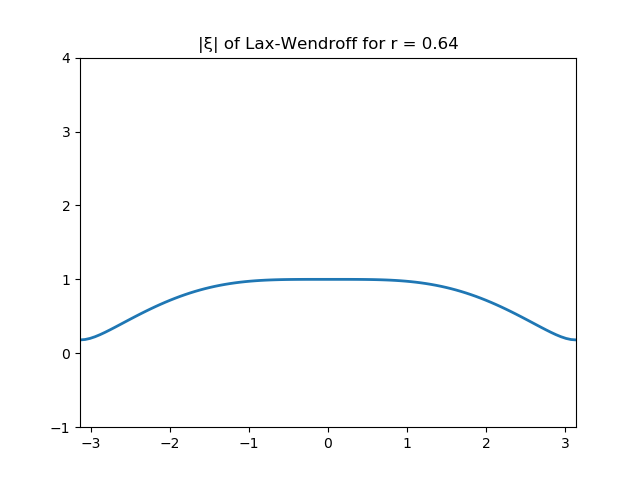

In [24]:
pltxilaxwen()

In [ ]:
pltxiwen()

<IPython.core.display.Javascript object>


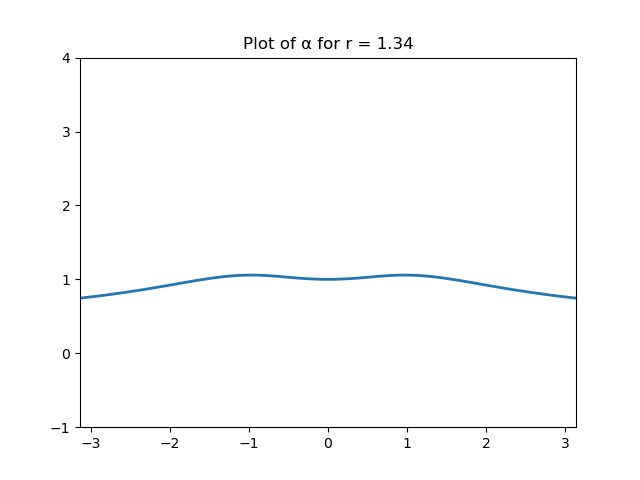

In [23]:
pltalflaxwen()

<IPython.core.display.Javascript object>


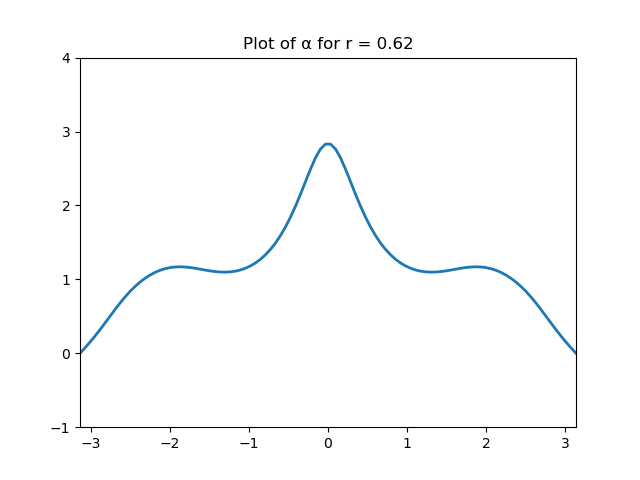

In [106]:
pltalfwen()

For the plot of $\mid \xi \mid$ of Lax-Wendroff we see that when $r=1$ it doesn't dissipate or disperse. We can also see that it becomes unstable when $r > 1$ something confirmed by the Neumann- analysis.  While the Wendroff method doesn't dissipate it still disperses a bit.

## c)

In [107]:
a = 1
h = 1/200
#r = 0.5
k = 1/400
r = a*k/h

xlimit = 3
tlimit = 2

N = int(tlimit/k -1)
M = int(xlimit/h -1)

ux0 = 0
u0t = 0

def f(x):
    return np.exp(-64*(x-0.5)**2)*np.sin(32*np.pi*x)

def FTBSc():
    U = np.zeros((M+1,N+1))

    for i in range(N):
        U[0,i+1] = u0t
    
    for i in range(M+1):
        U[i,0] = f(i*h)


    for i in range(N):
        n = i
        for j in range(M):
            m = j+1
            U[m,n+1] = U[m,n] - r*(U[m,n] - U[m-1,n])
    return U

def LaxWendrofc():
    U = np.zeros((M+1,N+1))
    
    for i in range(N):
        U[0,i+1] = u0t
        
    for i in range(M+1):
        U[i,0] = f(i*h)
        
    for i in range(N):
        n = i
        for j in range(M-1):
            m = j+1
            U[m,n+1] = U[m,n] - r/2*(U[m+1,n] - U[m-1,n]) + r**2/2*(U[m+1,n]-2*U[m,n] + U[m-1,n])
            
    return U

def Wendrofc():
    U = np.zeros((M+1,N+1))
    
    for i in range(N):
        U[0,i+1] = u0t
    
    for i in range(M+1):
        U[i,0] = f(i*h)
    
     
    A = np.zeros((M,M))
    for i in range(M):
        A[i,i] = 1
        if M > 0:
            A[i,i-1] = (1-r)/(1+r)
             
    for i in range(N):
        n = i
        b = np.zeros(M)
        
        b = U[:-1,n] + (1-r)/(1+r)*U[1:,n]
        b[0] += -(1-r)/(1+r)*u0t
        
        U[1:,n+1] = np.linalg.solve(A,b)
    
    return U

In [108]:
UFTBS = FTBSc()
UW = Wendrofc()
ULW = LaxWendrofc()

Lax - Wendrof

<IPython.core.display.Javascript object>


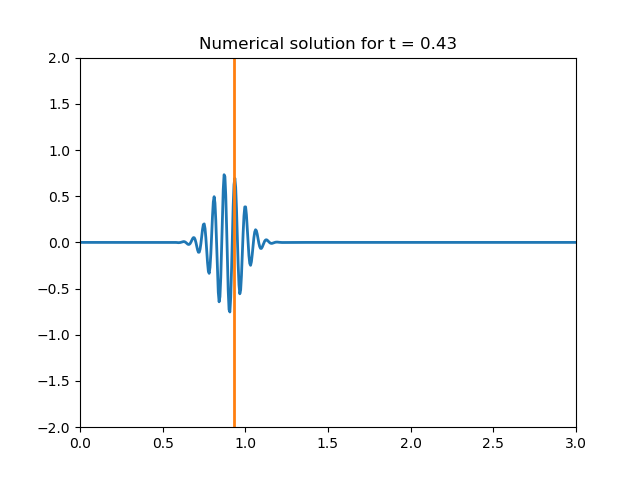

In [109]:
fig = plt.figure()
ax = plt.axes(xlim=(0, xlimit), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
#line3, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    line2.set_data([], [])
    #line3.set_data([], [])
    return line,

def animate(i):
    titl = "Numerical solution for t = " + str(round((k*i),2))
    ax.set_title(titl)
    x = np.linspace(0, xlimit, M+1)
    y = ULW[:,i]
    line.set_data(x, y)
    line2.set_data(a*k*i+0.5,[-2,2])
    #line3.set_data(k*i*1.05+0.75,[-2,2])
    
    
    return line, line2, #line3,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N+1, interval=10, blit=True)
plt.show()

Wendrof

<IPython.core.display.Javascript object>


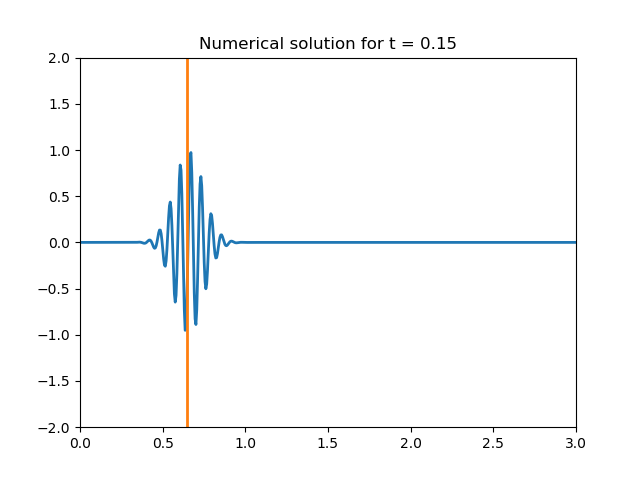

In [110]:
fig = plt.figure()
ax = plt.axes(xlim=(0, xlimit), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
#line3, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    line2.set_data([], [])
    #line3.set_data([], [])
    return line,

def animate(i):
    titl = "Numerical solution for t = " + str(round((k*i),2))
    ax.set_title(titl)
    x = np.linspace(0, xlimit, M+1)
    y = UW[:,i]
    line.set_data(x, y)
    line2.set_data(a*k*i+0.5,[-2,2])
    #line3.set_data(k*i*1.05+0.75,[-2,2])
    
    
    return line, line2, #line3,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N+1, interval=10, blit=True)
plt.show()

In Lax-Wendroff we see dissipation and we see that the phase speed $\alfa$ is different from the group speed. The group speed is also different from the analytical speed $a$. On the Wendroff method we notice all the same things except dissipation. From the results in $b$ it was unexpected to see no dispersion on neither Lax-Wendroff or Wendroff.

##  Task 2

The numerical solution for $U_{m, p}^n$ 
$$ u_{tt} = u_{xx} + u_{yy} + f ( x,y,t ) $$
using central difference becomes 
$$ \frac{U_{m, p}^{n+1} - U_{m, p}^{n} + U_{m, p}^{n-1}}{k^2} = \frac{U_{m+1, p}^{n}- 2 U_{m, p}^{n} + U_{m-1, p}^{n}}{h^2} 
+ \frac{U_{m, p+1}^{n} -2 U_{m, p}^{n} + U_{m, p-1}^{n}}{h^2} + f(x,y,t) \qquad (1)$$

Aolving for $U_{m, p}^{n+1}$ we get: 
$$U_{m, p}^{n+1} = 2U_{m, p}^{n}  +\frac{k^2}{h}(U_{m+1, p}^{n} + U_{m, p+1}^{n} - 4 U_{m, p}^{n} + U_{m, p-1}^{n} + U_{m-1, p}^{n}) - U_{m, p}^{n-1} + k^2 f(x,y,t)$$

To find the first time tep we approximate $u_t(x,y,0)$ with a central difference:

$$ u_t(x,y,0) = +\frac{U_{m, p}^{1} - U_{m, p}^{-1}}{2k} = v_0(x,y)$$
$$ U_{m, p}^{-1} = U_{m, p}^{1} - 2k v_0 (x,y) \qquad (2)$$

By inserting the equation for $U_{m, p}^{-1}$ (2) in (1) with $n=0$, we find 
$$U_{m, p}^{1} = (2U_{m, p}^{0} + \frac{k^2}{h^2}(U_{m+1, p}^{n} + U_{m, p+1}^{n} - 4 U_{m, p}^{n} + U_{m, p-1}^{n} + U_{m-1, p}^{n})+2k v_0(x,y) + k^2 f(x,y,t))/2$$

Reflecting boundary:

The Neumann condition: 
$$ \frac{\delta u}{\delta \pmb{n}} = 0$$

at the boundary:

$x = -1 \rightarrow u_x = 0$

$x = 1 \rightarrow -u_x = 0$

$y = -1 \rightarrow u_y = 0$

$y = 1 \rightarrow -u_y = 0$ 

Using a central difference we get 
$$\frac{ U_{m+1, p}^{n} - U_{m-1, p}^{n}}{2 h} = 0 $$

$$U_{m-1, p}^{n} = U_{m+1, p}^{n}\qquad (3.1)$$
for the x-boundaries, and likewise for the y-boundaries: 
$$ U_{m, p-1}^{n} = U_{m, p+1}^{n} \qquad (3.2)$$

We find $U_{m, p}^{n+1}$ at the boundaries by inserting equations (3) in equation (1).

Absorbing boundary:

By using the central difference on the approximation, on the boundary $x = -1$: $u_t - u_x  = 0$.
We get:
$$ \frac{U_{m, p}^{n+1}- U_{m, p}^{n-1}}{2k} - \frac{U_{m+1, p}^{n}- U_{m-1, p}^{n}}{2h} = 0$$
Solving for $U_{m-1, p}^{n}$ : 
$$U_{m-1, p}^{n} = U_{m+1, p}^{n} - \frac{h}{k} (U_{m, p}^{n+1} -U_{m, p}^{n-1}) \qquad (4)$$

By inserting equation (4) into equation (1) we get:
$$U_{m, p}^{n+1} = 2 U_{m, p}^{n} + \frac{k^2}{h^2}(U_{m+1, p}^{n} + U_{m, p+1}^{n} - 4 U_{m, p}^{n} + U_{m, p-1}^{n} U_{m -1, p}^{n}) + (U_{m+1, p}^{n} - \frac{h}{k} (U_{m, p}^{n+1} - U_{m, p}^{n-1})) - U_{m, p}^{n-1} + k f(x,y,t)$$
Solving for $U_{m, p}^{n+1}$ we get:
$$U_{m, p}^{n+1}  = (2U_{m, p}^{n} + \frac{k^2}{h^2}(2U_{m+1, p}^{n} + U_{m, p+1}^{n} - 4 U_{m, p}^{n} + U_{m, p-1}^{n}) + \frac{k}{h}U_{m, p}^{n-1} - U_{m, p}^{n-1} + k f(x,y,t)) /(1 + \frac{k}{h}) \qquad (5)$$

By symmetry the other boundaries will be similar, only changing what spacial term $U_{m\pm1, p\pm1}^{n}$ is doubled. Due to the corners having two boundaries, the $k/h$ -terms will be doubled there aswell.

In [94]:
h = 1/50
k = 1/100

omega = 32
tmark = np.pi/omega

a = 100

xmin = -1
xmax = 1
ymin = -1
ymax = 1

T = 3

N = int(T/k)
M = int((xmax-xmin)/h)
P = int((ymax-ymin)/h)


def u0(x,y):
    return 0

def v0(x,y):
    return 0

def f1(x,y,t):
    if 0 <= t and t <= tmark:
        return np.exp(-a*((x+0)**2+(y+0)**2))*np.sin(omega*t) #+ np.exp(-a*((x-0.5)**2+(y-0.5)**2))*np.sin(omega*t)
    else:
        return 0
    
def f2(x,y,t):
    if 0 <= t and t <= tmark:
        return np.exp(-a*((x+0.5)**2+(y+0.5)**2))*np.sin(omega*t) #+ np.exp(-a*((x-0.5)**2+(y-0.5)**2))*np.sin(omega*t)
    else:
        return 0
    
def f3(x,y,t):
    return np.exp(-a*((x+0)**2+(y+0)**2))*np.sin(omega*t) #+ np.exp(-a*((x-0.5)**2+(y-0.5)**2))*np.sin(omega*t)

def f4(x,y,t):
    return np.exp(-a*((x+0.5)**2+(y+0.5)**2))*np.sin(omega*t) + np.exp(-a*((x-0.5)**2+(y-0.5)**2))*np.sin(omega*t)
    
def reflect(f):
    
    U = np.zeros((M,P,N))


    for m in range(M):
        for p in range(P):
            U[m,p,0] = u0(xmin + m*h, ymin + p*h)

    for m in range(M):
        for p in range(P):
            if (0 < m and m < M-1) and (0 < p and p < P-1):
                U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2
            else:
                if (m == 0 and p == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p+1,0] + U[m+1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == 0 and p == P-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p-1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m+1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == M-1 and p == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m-1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p+1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == M-1 and p == P-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m-1,p,0] + U[m,p-1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m+1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (p == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p+1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == M-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m-1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (p == P-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p-1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                else:
                    print ("error")




    for i in range(N-2):
        n = i+1
        print('\r', 'Iteration', n, '/', N, end='')
        for m in range(M):
            for p in range(P):
                if (0 < m and m < M-1) and (0 < p and p < P-1):
                    U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)
                else:
                    if (m == 0 and p == 0):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p+1,n] + U[m+1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (m == 0 and p == P-1):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p-1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m+1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (m == M-1 and p == 0):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m-1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p+1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (m == M-1 and p == P-1):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m-1,p,n] + U[m,p-1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (m == 0):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m+1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (p == 0):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p+1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (m == M-1):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m-1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    elif (p == P-1):
                        U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p-1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)

                    else:
                        print ("error")

    return U


def absorb(f):
    
    U = np.zeros((M,P,N))


    for m in range(M):
        for p in range(P):
            U[m,p,0] = u0(xmin + m*h, ymin + p*h)

    for m in range(M):
        for p in range(P):
            if (0 < m and m < M-1) and (0 < p and p < P-1):
                U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2
            else:
                if (m == 0 and p == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p+1,0] + U[m+1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == 0 and p == P-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p-1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m+1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == M-1 and p == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m-1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p+1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == M-1 and p == P-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m-1,p,0] + U[m,p-1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m+1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (p == 0):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p+1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (m == M-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m-1,p,0] + U[m,p+1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                elif (p == P-1):
                    U[m,p,1] = (2*U[m,p,0] + k**2/h**2*(U[m+1,p,0] + U[m,p-1,0] - 4*U[m,p,0] + U[m,p-1,0] + U[m-1,p,0]) + 2*k*v0(xmin + m*h, ymin + p*h) + k**2*f(xmin + m*h, ymin + p*h, 0))/2

                else:
                    print ("error")
    
    
    for i in range(N-2):
        n = i+1
        #sys.stdout.write(str(n) + "/"+ str(N))
        #sys.stdout.flush()
        print('\r', 'Iteration', n, '/', N, end='')
        for m in range(M):
            for p in range(P):
                if (0 < m and m < M-1) and (0 < p and p < P-1):
                    U[m,p,n+1] = 2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k)
                else:
                    if (m == 0 and p == 0):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p+1,n] + U[m+1,p,n]) + 2*k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+2*k/h)

                    elif (m == 0 and p == P-1):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p-1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m+1,p,n]) + 2*k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+2*k/h)

                    elif (m == M-1 and p == 0):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m-1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p+1,n] + U[m-1,p,n]) + 2*k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+2*k/h)

                    elif (m == M-1 and p == P-1):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m-1,p,n] + U[m,p-1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) + 2*k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+2*k/h)

                    elif (m == 0):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m+1,p,n]) + k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+k/h)

                    elif (p == 0):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p+1,n] + U[m-1,p,n]) + k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+k/h)

                    elif (m == M-1):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m-1,p,n] + U[m,p+1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) + k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+k/h)

                    elif (p == P-1):
                        U[m,p,n+1] = (2*U[m,p,n] + k**2/h**2*(U[m+1,p,n] + U[m,p-1,n] - 4*U[m,p,n] + U[m,p-1,n] + U[m-1,p,n]) + k/h*U[m,p,n-1] - U[m,p,n-1] + k**2*f(xmin + m*h, ymin + p*h, n*k))/(1+k/h)

                    else:
                        print ("error")

    return U

In [89]:
#UR = reflect()

In [90]:
#UA = absorb()

In [91]:
def plotWave(bcf, f, save = False):
    
    
    U = bcf(f)
    
    fig = plt.figure()

    ax = plt.axes(projection='3d')
    x = np.linspace(xmin,xmax,M)
    y = np.linspace(ymin,ymax,P)
    X, Y = np.meshgrid(x, y)

    def animateI(i):
        ax.clear()
        Z  = U[:,:,i]
        titl = "Numerical solution for M = " + str(M)
        ax.set_title(titl)
        ax.set_zlim3d(np.amin(U),np.amax(U)*1.1)
        surfI = ax.plot_surface(X, Y, Z, cmap='plasma')
        return surfI

    animI = FuncAnimation(fig, animateI,
                                   frames=N, interval=10, blit=True)
    if save == True:
        animI.save('wave.gif')
        
    return animI

 Iteration 298 / 300

<IPython.core.display.Javascript object>


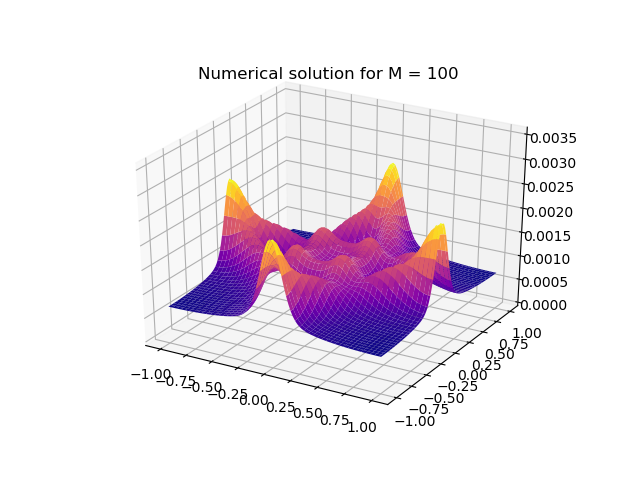

In [84]:
plotWave(reflect,f1)

 Iteration 298 / 30000129 / 300300

<IPython.core.display.Javascript object>


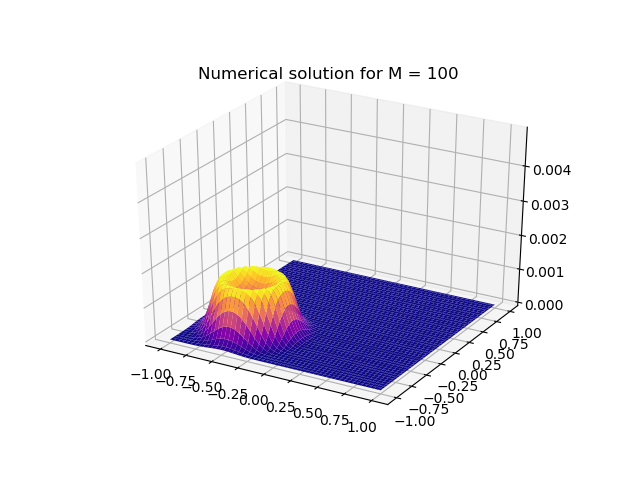

In [87]:
plotWave(reflect,f2)

 Iteration 298 / 300 175 / 300

<IPython.core.display.Javascript object>


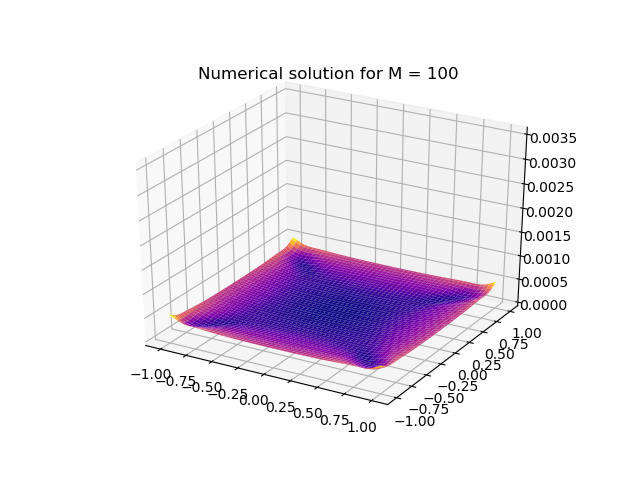

In [85]:
plotWave(absorb,f1)

 Iteration 298 / 300

<IPython.core.display.Javascript object>


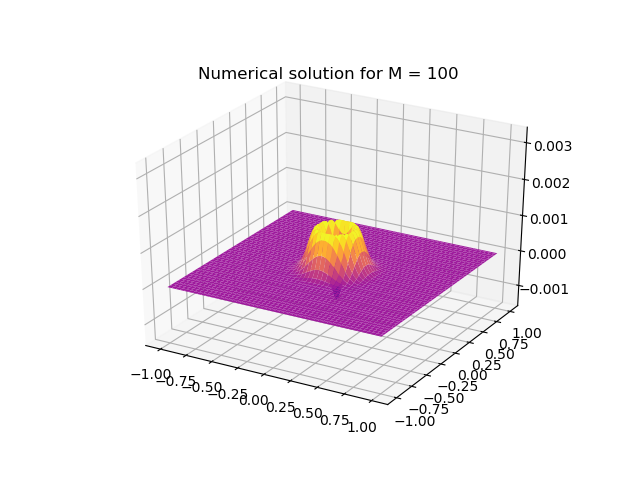

In [92]:
plotWave(absorb,f3)

 Iteration 298 / 300 214 / 300

<IPython.core.display.Javascript object>


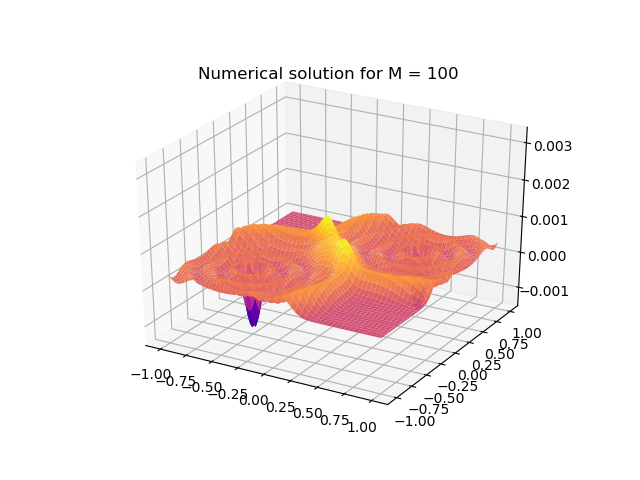

In [95]:
plotWave(absorb,f4)

the numerical solution for $U_$